In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import mglearn

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
# 차트의 한글 깨짐 방지를 위한 코드 추가

from matplotlib import font_manager, rc
import platform

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우)
font_path = ''
font_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font',family = font_name)

%matplotlib inline

In [12]:
from sklearn.model_selection import train_test_split

# 커널 서포트 벡터 머신(kernelized support vector machines)
단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장<br>
여기서는 분류에 이용하는 SVC를 사용하지만 회귀용 SVR도 같은 개념을 적용할 수 있음

선형적으로 구분되지 않는 이진 분류 데이터셋은 분류를 위한 선형 모델의 직선으로 데이터 포인터를 나눌 수 없음<br>
하지만 특성0,특성1외 (특성1)^2의 3차원 데이터셋으로 표현한다면 평면을 사용해 두 클래스를 구분할 수 있음.

Text(0, 0.5, '특성 1')

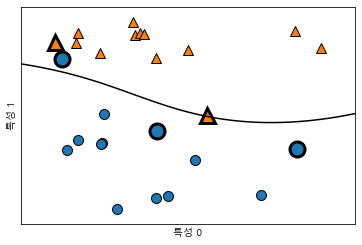

In [10]:
from sklearn.svm import SVC

# forge 데이터셋
X,y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf',C=10,gamma=0.1).fit(X,y)    # linear, poly, rbf, sigmoid, precomputed
mglearn.plots.plot_2d_separator(svm,X,eps=.5)

# 데이터 포인터
mglearn.discrete_scatter(X[:,0],X[:,1],y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_부호에 의해 서포트 벡터의 클래스 레이블이 결정된다.
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

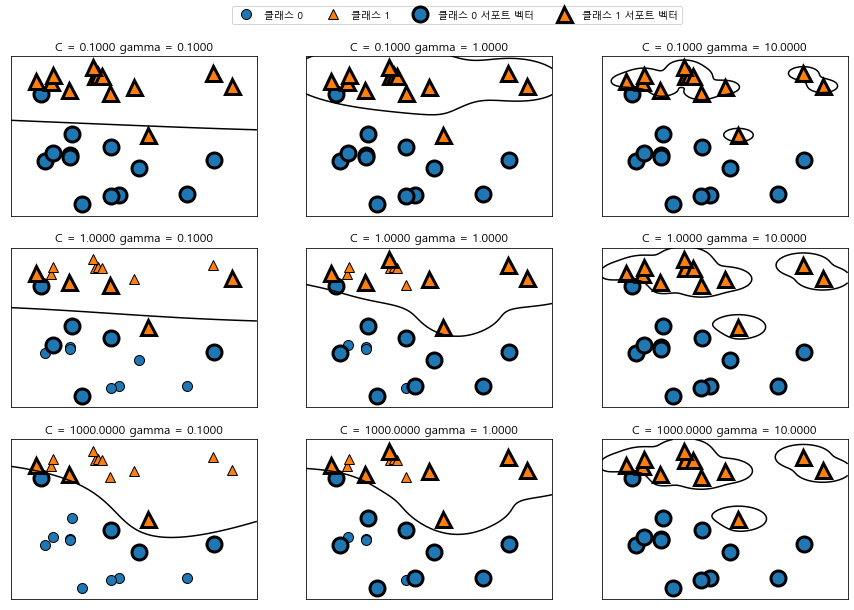

In [11]:
# svm 매개변수 튜닝
# gamma 매개변수는 하나의 훈련 샘플이 미치는 영향의 범위를 결정, 큰 값이라면 영향을 미치는 범위가 제한적
# C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수. C는 각 포인트의 중요도를 제한

fig, axes = plt.subplots(3,3,figsize=(15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma,ax=a)
axes[0,0].legend(['클래스 0','클래스 1','클래스 0 서포트 벡터','클래스 1 서포트 벡터'],ncol=4,loc=(.9,1.2))

In [19]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# rbf 커널 SVM, 기본값 C=1,gamma=1/n_features
svc = SVC()
svc.fit(X_train,y_train)

print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))


0.903755868544601
0.9370629370629371


Text(0, 0.5, '특성 크기')

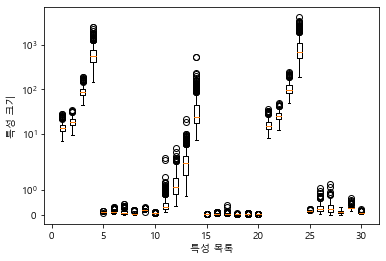

In [14]:
plt.boxplot(X_train,manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

유방암 데이터셋의 특성은 자릿수 자체가 완전히 다르다. 선형 모델 등에서는 어느 정도 해결될 수 있지만 커널SVM에서는 영향이 아주 크므로 해결해야한다.

## 전처리
- 특성 값의 범위가 비슷해지도록 조정하는 방법이 있다. 자세한 전처리 메서드는 차후 다루도록 하고 여기서는 직접 변환

MinMaxScaler

In [20]:
min_on_training = X_train.min(axis=0)

range_on_training = (X_train - min_on_training).max(axis=0)

X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최소값\n", X_train_scaled.min(axis=0))
print("특성별 최대값\n", X_train_scaled.max(axis=0))

특성별 최소값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [21]:
X_test_scaled = (X_test - min_on_training)/range_on_training

In [23]:
svc = SVC()
svc.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
# 데이터의 스케일을 조정하니 결과가 크게 달라짐

print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

0.9835680751173709
0.972027972027972


In [25]:
svc = SVC(C=100)
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

1.0
0.965034965034965


In [28]:
svc = SVC(C=0.1)
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

0.9483568075117371
0.958041958041958


데이터의 특성이 몇 개 안 되더라도 복잡한 결정 경계를 만들 수 있다. 저차원과 고차원의 데이터(특성이 많건 적건)에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않는다. 10,000개 샘플 정도면 잘 작동하지만 100,000개 이상이면 성능을 확신할 수 없음